<a href="https://colab.research.google.com/github/AlexKostjuk/dz_16/blob/master/dz_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -U diffusers

In [1]:
!pip install --upgrade huggingface_hub transformers



In [1]:
import torch
from diffusers import FluxPipeline
from google.colab import userdata
from huggingface_hub import login


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
from PIL import Image
from IPython.display import display

In [3]:
token = userdata.get("1_TOKEN")
login(token)

In [5]:
pipe = FluxPipeline.from_pretrained("black-forest-labs/FLUX.1-dev", torch_dtype=torch.bfloat16)
pipe.enable_sequential_cpu_offload()
# pipe.enable_model_cpu_offload() #save some VRAM by offloading the model to CPU. Remove this if you have enough GPU power
# pipe.to("cuda")



Fetching 23 files:   0%|          | 0/23 [00:00<?, ?it/s]

special_tokens_map.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [6]:
prompt = "A cat holding a sign that says hello world"
image = pipe(
    prompt,
    height=512,
    width=512,
    guidance_scale=3.5,
    num_inference_steps=20,
    max_sequence_length=512,
    generator=torch.Generator("cpu").manual_seed(0)
).images[0]
image.save("/content/drive/MyDrive/flux-dev.png")

  0%|          | 0/20 [00:00<?, ?it/s]

In [8]:
img = Image.open("/content/drive/MyDrive/flux-dev.png")

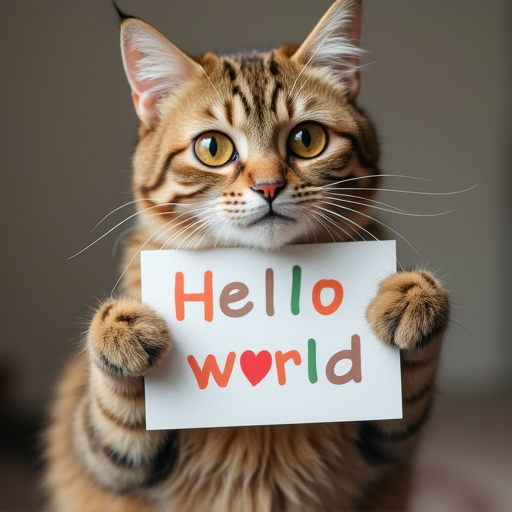

In [9]:
display(img)
